In [4]:
# instgalamos e importamos las librerías que necesitamos
!pip install pandas matplotlib
!pip install pandas matplotlib seaborn

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Fase 1: Exploración y Limpieza

1.Exploración Inicial:
Realiza una exploración inicial de los datos para identificarposibles problemas, como valores nulos, atípicos o datosfaltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener informaciónsobre la estructura de los datos, la presencia de valoresnulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

In [5]:
df_CLH = pd.read_csv("Customer Loyalty History.csv", index_col=None)
df_CFA = pd.read_csv("Customer Flight Activity.csv", index_col=None)

In [6]:
# Función para exploración general de datos
def exploracion_datos(df):
    print('_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________\n')
    print(df.info())
    
    print('___________________ FORMA DEL DATAFRAME ____________________\n')
    print(f"El número de filas que tenemos es de {df.shape[0]}.\nEl número de columnas es de {df.shape[1]}\n")
    
    print('_______________ NULOS, ÚNICOS Y DUPLICADOS _________________\n')
    print('La cantidad de valores NULOS por columna es de:\n')
    print(df.isnull().sum())
    print('____________________________________________________________\n')

    print('El porcentaje de valores NULOS por columna es de:\n')
    porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
    porcentaje_nulos = porcentaje_nulos.round(2)
    print(porcentaje_nulos)
    print('____________________________________________________________\n')

    print('La cantidad de valores ÚNICOS por columna es de:\n')
    for columna in df.columns:
        cantidad_unicos = df[columna].nunique()
        print(f'La columna {columna} tiene {cantidad_unicos} valores únicos.')
    print('____________________________________________________________\n')

    print('La cantidad de valores DUPLICADOS por columna es de:\n')
    for columna in df.columns:
        cantidad_duplicados = df.duplicated(subset=columna).sum()
        print(f'La columna {columna} tiene {cantidad_duplicados} valores duplicados.')
    print('____________________________________________________________\n')
    
    print('____________________ RESUMEN ESTADÍSTICO ____________________\n')
    print('___________________ Variables Numéricas _____________________\n')
    if df.select_dtypes(include=[float, int]).empty:
        print("No hay variables numéricas para mostrar el resumen estadístico.")
    else:
        print(df.describe().T)
    print('____________________________________________________________\n')
    print('___________________ Variables Categóricas _____________________\n')
    if df.select_dtypes(include=[object]).empty:
        print("No hay variables categóricas para mostrar el resumen estadístico.")
    else:
        print('__________________ Variables Categóricas ____________________\n')
        print(df.describe(include='object').T)

In [7]:
# Llamamos a la función para explorar el dataframe df_CLH 
exploracion_datos(df_CLH)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   floa

In [8]:
# Vemos que aspecto tienen las 5 primeras columnas del dataframe df_CLH 
df_CLH.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
# Llamamos a la función para explorar el dataframe df_CFA
exploracion_datos(df_CFA)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None
___________________ FORMA DEL DATAFRAME ____________________

E

In [10]:
df_CFA.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [11]:
# Unión de los dataframes 
merged_df = pd.merge(df_CLH, df_CFA, on='Loyalty Number', how='inner')

In [12]:
# Comprobamos que se han unido correctamente
exploracion_datos(merged_df)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 

In [13]:
merged_df.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
184291,769891,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Divorced,Nova,7294.85,Standard,2012,10,NaN,NaN,2017,4,6,3,9,1296,129.0,577,47
296267,629966,Canada,Ontario,Ottawa,K1G 4Z0,Male,Bachelor,87195.0,Married,Star,3329.89,Standard,2018,9,NaN,NaN,2017,11,0,0,0,0,0.0,0,0
113779,985266,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Nova,2991.70,Standard,2012,11,NaN,NaN,2018,8,3,0,3,1182,118.0,0,0
83253,444366,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Single,Aurora,13024.13,Standard,2016,8,NaN,NaN,2018,10,5,0,5,3420,342.0,0,0
198368,636673,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Doctor,74492.0,Single,Nova,8428.47,Standard,2015,3,NaN,NaN,2017,9,0,0,0,0,0.0,0,0


Fase 1: Exploración y Limpieza

2.Limpieza de Datos:
Elimina o trata los valores nulos, si los hay, en lascolumnas clave para asegurar que los datos esténcompletos.
Verifica la consistencia y corrección de los datos paraasegurarte de que los datos se presenten de formacoherente.
Realiza cualquier ajuste o conversión necesaria en lascolumnas (por ejemplo, cambiar tipos de datos) paragarantizar la adecuación de los datos para el análisisestadístico.

In [14]:
# Eliminamos las columnas "Cancelation Year" y "Cancelation Month" porque tienen un altgo porcentaje de nulos y no son relevantes para nuestro análisis. También "Country" porque es el mismo para todos los registros.
merged_df = merged_df.drop(columns=['Cancellation Year', 'Cancellation Month', 'Country'])

# Verificamos las columnas después de eliminar
print("Columnas después de eliminar:")
print(merged_df.columns)

Columnas después de eliminar:
Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')


In [15]:
# Hacemos función para comparar la media y la mediana de una variable. En una distribución simétrica y sin valores atípicos, la media y la mediana deberían ser aproximadamente iguales.
def cal_min_median(df, columna):
    media = df[columna].mean()
    mediana = df[columna].median()
    return media, mediana

In [16]:
# Comparamos la media y la mediana de la columna "Salary" para ver si imputamos sus nulos con la media o la mediana. 
cal_min_median(merged_df, "Salary")

(79268.82595262615, 73479.0)

In [17]:
# Función para imputar los nulos con la mediana. 
def null_to_median(df, columna):
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)
    return df

In [18]:
# Como la media y la mediana son bastante diferentes vamos a optar imputar con la mediana. 
null_to_median(merged_df, "Salary")

# Comprobamos si se ha hecho correctamente
merged_df['Salary'].isnull().sum()

0

In [19]:
# Función para pasar float a integer en el caso de la columna "Salary" 
def float_to_int(df, columns):
    for col in columns:
        df[col] = df[col].astype(int)
    
    return df

In [20]:
# Pasamos el tipo de dato de float a integer en el caso de "Salary" porque no los valores de esta columna no tienen decimales
col_float_to_int = ["Salary"]
float_to_int(merged_df, col_float_to_int)

# Comprobamos que se ha hecho correctamente
merged_df['Salary'].dtype

dtype('int32')

In [21]:
# Diccionario para mapear números de mes a nombres de mes
month_dict = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
    }

# Convertimos los números de mes a nombres de mes utilizando map 
merged_df['Month'] = merged_df['Month'].map(month_dict)

# Vemos si se ha hecho correctamente
merged_df.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,Enero,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,Febrero,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,Marzo,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,Abril,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2018,Octubre,6,2,8,3352,335.0,465,38


In [22]:
# Función para eliminar regkistros (filas) duplicadas
def drop_dup(df):
    # Verificar filas duplicadas basadas en todas las columnas
    dup_rows = df.duplicated(keep=False)

    # Filtrar las filas duplicadas
    dup = df[dup_rows]

    # Eliminar todas las filas duplicadas
    no_dup_df = df.drop_duplicates(keep=False)

    return no_dup_df, dup

In [23]:
# Llamamos a la función, que nos devuelve dos dataframes (por si acaso), el que tiene y el que no tiene duplicados 
no_dup_df, dup = drop_dup(merged_df)

In [24]:
# El dataframe sin duplicados tiene menos registros, así que las duplicidades se han eliminado correctamente. A partir de ahora usaremos este dataframe para aplicar lass siguientes acciones. 
no_dup_df.shape

(401912, 22)

In [25]:
# Función para chequear si hay valores negativos en las columnas numéricas
def neg_values(df):
    neg_counts = {}

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            neg_counts[column] = (df[column] < 0).sum()

    return neg_counts


# Llamar a la función para contar valores negativos
neg_counts = neg_values(no_dup_df)

# Mostrar los resultados
print("Número de valores negativos por columna:")
for column, count in neg_counts.items():
    print(f"Columna '{column}': {count} valores negativos")

Número de valores negativos por columna:
Columna 'Loyalty Number': 0 valores negativos
Columna 'Salary': 480 valores negativos
Columna 'CLV': 0 valores negativos
Columna 'Enrollment Year': 0 valores negativos
Columna 'Enrollment Month': 0 valores negativos
Columna 'Year': 0 valores negativos
Columna 'Flights Booked': 0 valores negativos
Columna 'Flights with Companions': 0 valores negativos
Columna 'Total Flights': 0 valores negativos
Columna 'Distance': 0 valores negativos
Columna 'Points Accumulated': 0 valores negativos
Columna 'Points Redeemed': 0 valores negativos
Columna 'Dollar Cost Points Redeemed': 0 valores negativos


In [26]:
#Sustituimos valores negativos por positivos
no_dup_df.loc[no_dup_df['Salary'] < 0, 'Salary'] = no_dup_df['Salary'].abs()

#Comprobamos que ya no hay valores negativos
no_dup_df[no_dup_df['Salary'] < 0]

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


Fase 2: Visualización

Usando las herramientas de visualización que has aprendido duranteeste módulo, contesta a las siguientes gráficas usando la mejor gráficaque consideres:

1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Como vemos en el histograma a continuación, los meses en los que se reservan más vuelos son los de verano, junio, julio y agosto. Seguidos de diciembre, mes de la Navidad.

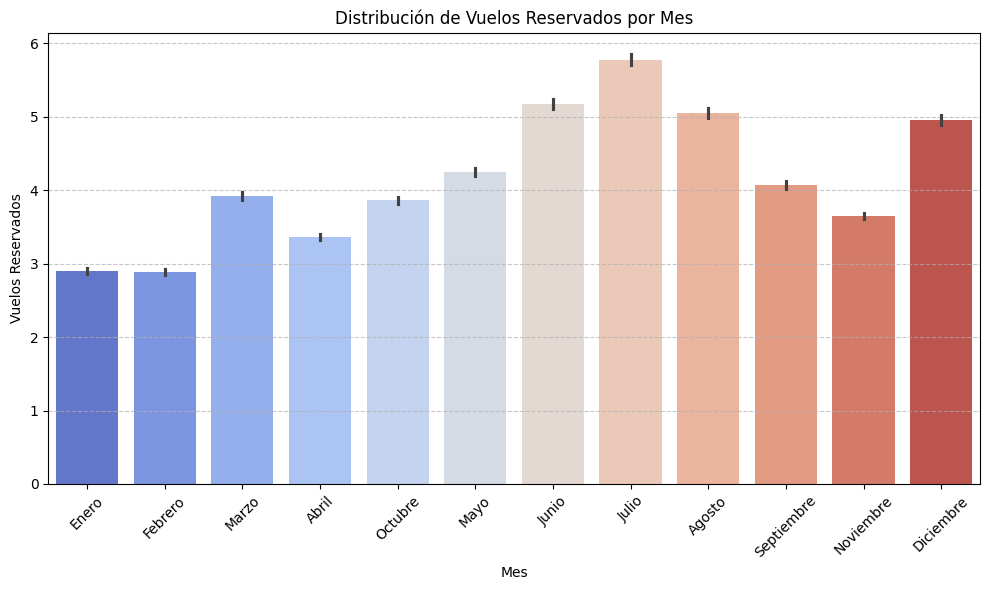

In [28]:
# Creamos un histograma
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Flights Booked', hue='Month', data=no_dup_df, palette='coolwarm', dodge=False, legend=False)
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xticks(rotation=45)
plt.tight_layout()  # Asegura que los elementos no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

Como los puntos en el diagrama de dispersión muestran un patrón lineal y el coeficiente de correlación es cercano a 1 o -1, podríamos afirmar que existe una relación fuerte entre la distancia y los puntos acumulados. 

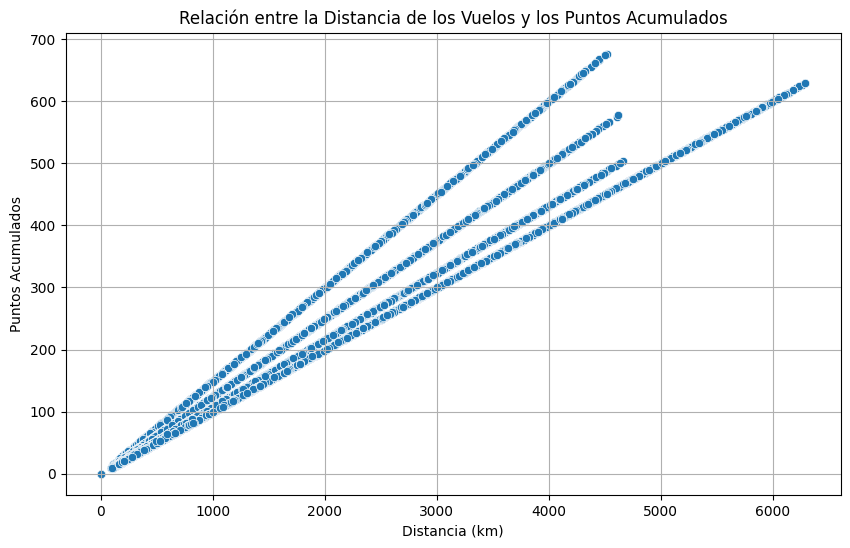

Coeficiente de correlación: 0.9945277510679296


In [34]:
# Crear el diagrama de dispersión con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Points Accumulated', data=no_dup_df)
plt.xlabel('Distancia (km)')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre la Distancia de los Vuelos y los Puntos Acumulados')
plt.grid(True)
plt.show()

# Calcular el coeficiente de correlación
correlation = no_dup_df['Distance'].corr(no_dup_df['Points Accumulated'])
print(f'Coeficiente de correlación: {correlation}')

3.¿Cuál es la distribución de los clientes por provincia o estado?

Las provincias con más clientes son Ontario, British Columbia y Quebec. Las provincias con menos clientes son Newfoundland, Yukon y Prince Edward Island.

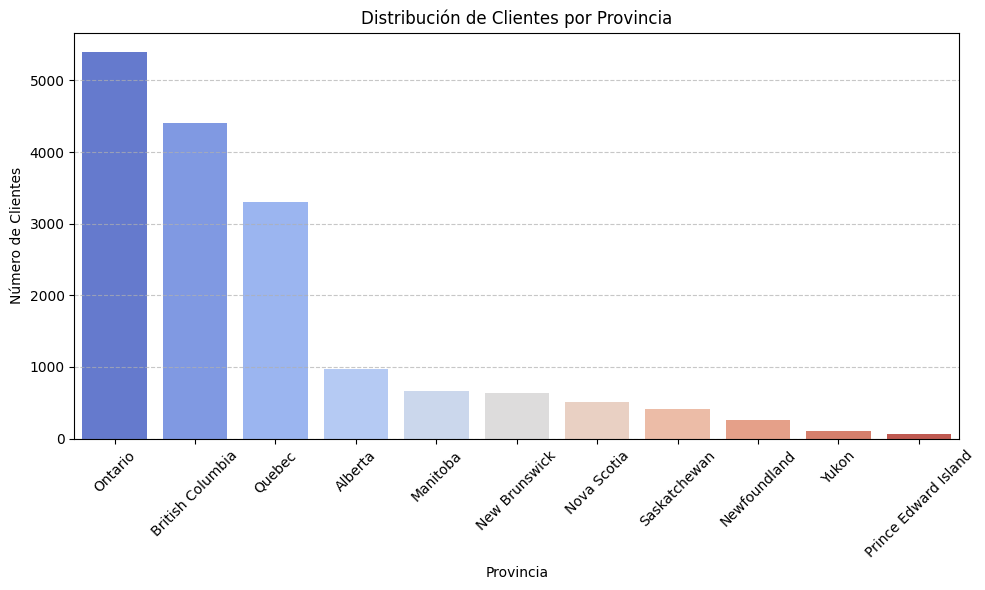

In [39]:
# Primero eliminamos las duplicidades de la 'Loyalty Number', que es la que identifica a cada cliente para que tenga en cuenta a cada cliente una sola vez
unique_customers = no_dup_df.drop_duplicates(subset='Loyalty Number')

# Agrupamos por 'Province' y contamos los clientes únicos
customer_distribution = unique_customers['Province'].value_counts().reset_index()
customer_distribution.columns = ['Province', 'Customer Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Customer Count', hue='Province', data=customer_distribution, palette='coolwarm', dodge=False, legend=False)
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Provincia')
plt.xticks(rotation=45)
plt.tight_layout()  # Asegura que los elementos no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Como podemos observar en el gráfico de barras de abajo los salarios más elevados se corresponden con los niveles educativos más altos, por lo que podemos afirmamos que hay una relación directamente proporcional entre las dos variables. 

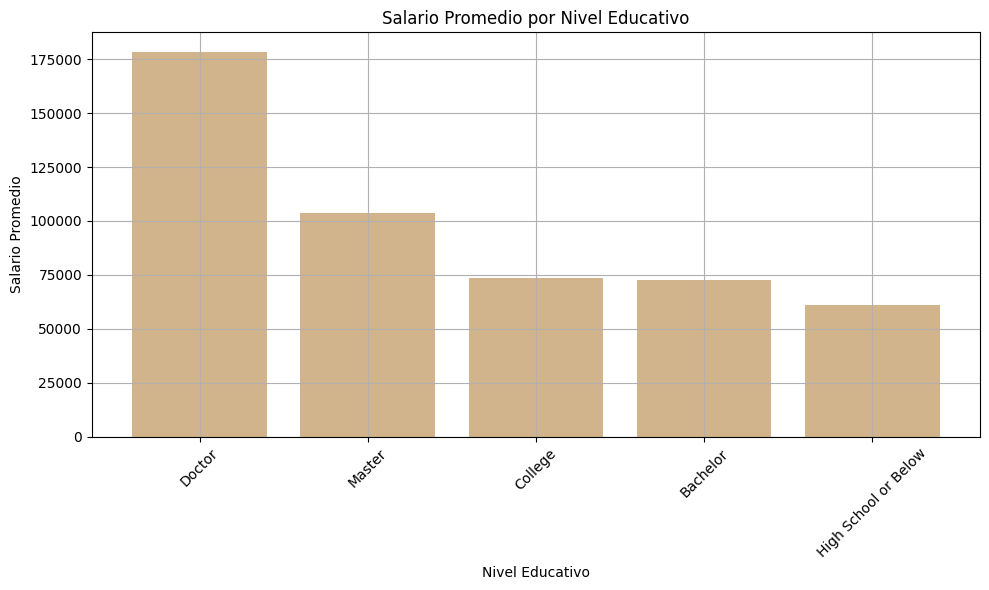

In [44]:
# Calculamos primero el salario promedio por nivel educativo
salario_promedio_por_educacion = no_dup_df.groupby('Education')['Salary'].mean().reset_index()

# Ordenamos los resultados
salario_promedio_por_educacion = salario_promedio_por_educacion.sort_values(by='Salary', ascending=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(salario_promedio_por_educacion['Education'], salario_promedio_por_educacion['Salary'], color='tan')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

El 45,7% de los clientes tienen la tarjeta "Star", seguidos del 33,9% que tienen la Nova y el 20,5% cuentan con la Aurora. 

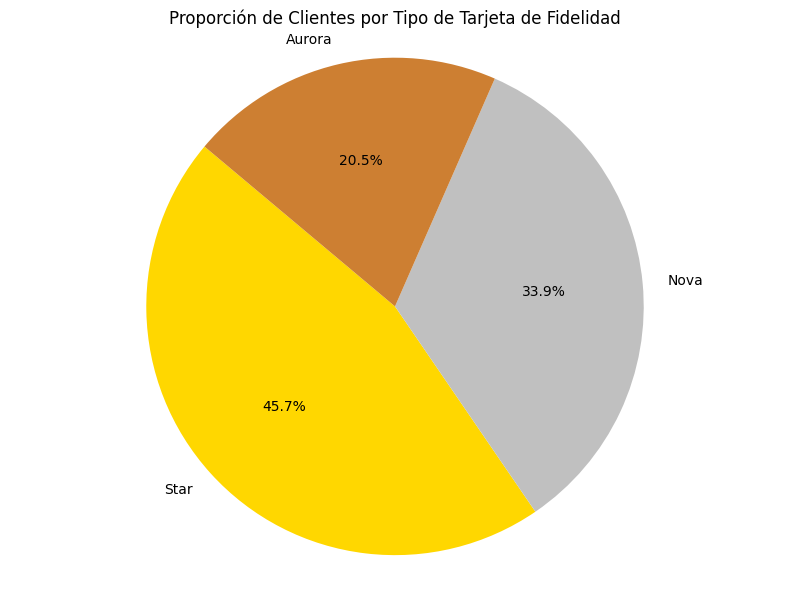

In [55]:
# Eliminamos duplicados en 'Loyalty Number'
df_unique_loyalty = no_dup_df.drop_duplicates(subset=['Loyalty Number'])

# Contamos el número de cada tipo de tarjeta de fidelidad
counts = df_unique_loyalty['Loyalty Card'].value_counts()

# Calcular la proporción
proporciones = counts / counts.sum()

# Configuramos el gráfico circular
plt.figure(figsize=(8, 6))
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Oro, Plata, Bronce
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.axis('equal')  
plt.tight_layout()
plt.show()

6.¿Cómo se distribuyen los clientes según su estado civil y género?
Como puede observarse en el gráfico de barras apiladas a continuación existe una mayor número de clientes casados, seguidos de solteros y por último divorciados. En los tres casos el número de hombres y mujeres es muy similar, siendo el de mujeres ligeramente más elevado. 

<Figure size 1000x600 with 0 Axes>

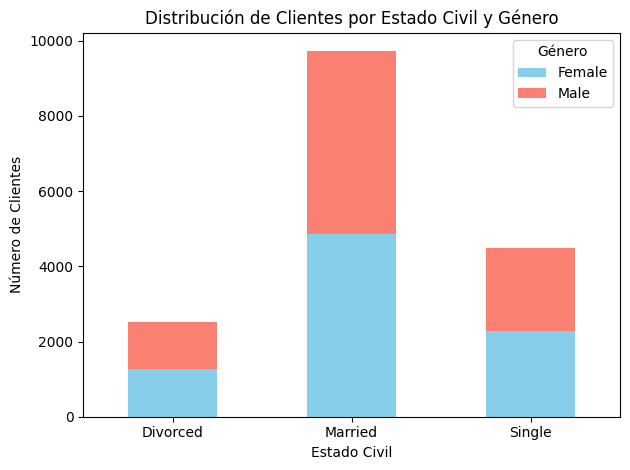

In [66]:
# Eliminar duplicados basados en 'Loyalty Number'
df_no_duplicates = no_dup_df.drop_duplicates(subset=['Loyalty Number'])

# Contar el número de clientes por estado civil y género
counts = df_no_duplicates.groupby(['Marital Status', 'Gender']).size().unstack()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.tight_layout()
plt.show()